## Загрузка данных

In [193]:
#загрузка библиотек
import pandas as pd 
import numpy as np
import torch
import seaborn as sns                
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn.model_selection import train_test_split
import torch.utils.data
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import random
import torch.nn as nn
from torch.nn import ReLU
from math import ceil
import torch.utils.data
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ParameterSampler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
torch.use_deterministic_algorithms(True)


In [194]:
df= pd.read_csv('https://code.s3.yandex.net/datasets/6_class.csv ')#загрузка файла
df.head(25)

,Unnamed: 0,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color
0,0,3068,0.002400,0.17000,16.120,0,Red
1,1,3042,0.000500,0.15420,16.600,0,Red
2,2,2600,0.000300,0.10200,18.700,0,Red
3,3,2800,0.000200,0.16000,16.650,0,Red
4,4,1939,0.000138,0.10300,20.060,0,Red
5,5,2840,0.000650,0.11000,16.980,0,Red
6,6,2637,0.000730,0.12700,17.220,0,Red
7,7,2600,0.000400,0.09600,17.400,0,Red
8,8,2650,0.000690,0.11000,17.450,0,Red
9,9,2700,0.000180,0.13000,16.050,0,Red


## Предобработка и анализ данных

In [195]:
df.info()# выводим сводную информации о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              240 non-null    int64  
 1   Temperature (K)         240 non-null    int64  
 2   Luminosity(L/Lo)        240 non-null    float64
 3   Radius(R/Ro)            240 non-null    float64
 4   Absolute magnitude(Mv)  240 non-null    float64
 5   Star type               240 non-null    int64  
 6   Star color              240 non-null    object 
dtypes: float64(3), int64(3), object(1)
memory usage: 13.2+ KB


Как идно из данных, пропущенные значения отсутствуют в таблице df.

In [196]:
df.columns


Index(['Unnamed: 0', 'Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color'],
      dtype='object')

Выведем все уникальные значения столбца Star color.

In [197]:
df['Star color'].sort_values().unique()

array(['Blue', 'Blue ', 'Blue White', 'Blue white', 'Blue white ',
       'Blue-White', 'Blue-white', 'Orange', 'Orange-Red',
       'Pale yellow orange', 'Red', 'White', 'White-Yellow', 'Whitish',
       'Yellowish', 'Yellowish White', 'white', 'yellow-white',
       'yellowish'], dtype=object)

Как видно из данных, приведеных в солбце Star color в некоторых названиях присутствуют пробелы, прописные и строчные буквы в одних и тех же названиях, лишние знаки и слова местами изменены. В данной связи преобразуем указанные данные к одинаковым значениям.

Напишем функцию для удаления лишних пробелов.

In [198]:
def clear_spaces(s):
    return s.replace(' ', '')

def clear_all_spaces(dat, column):
    dat[column] = dat[column].apply(clear_spaces)
clear_all_spaces(df, 'Star color')

In [199]:
def clear_spaces(s):
    return s.replace('-', '')

def clear_all_spaces(dat, column):
    dat[column] = dat[column].apply(clear_spaces)
clear_all_spaces(df, 'Star color')

In [200]:
df['Star color'] = df['Star color'].str.lower()

In [201]:
df['Star color'].sort_values().unique()

array(['blue', 'bluewhite', 'orange', 'orangered', 'paleyelloworange',
       'red', 'white', 'whiteyellow', 'whitish', 'yellowish',
       'yellowishwhite', 'yellowwhite'], dtype=object)

**Вывод:**  
В представленной таблице 7 колонок:
1) 'Luminosity(L/Lo)' - Относительная светимость L/Lo — светимость звезды относительно Солнца.  
2) 'Radius(R/Ro)'  - Относительный радиус R/Ro — радиус звезды относительно радиуса Солнца.  
3) 'Absolute magnitude(Mv)' - Абсолютная звёздная величина Mv — физическая величина, характеризующая блеск звезды.  
4) 'Star color' - Звёздный цвет (white, red, blue, yellow, yellow-orange и др.) — цвет звезды, который определяют на основе спектрального анализа.  
5) 'Star color' - Тип звезды.  
6) 'Temperature (K)' - Абсолютная температура T(K) — температура на поверхности звезды в Кельвинах.  
7) 'Unnamed: 0' - номер звезды.

Как видно из данных, в таблице приведены 6 признаков, характеризующих звезду.
Целевой признак - 'Temperature (K)'.

## Построение базовой нейронной сети

In [202]:
#обознаим целевой признак
target = df['Temperature (K)']
features = df.drop(columns=['Temperature (K)'])
features

,Unnamed: 0,Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color
0,0,0.002400,0.1700,16.12,0,red
1,1,0.000500,0.1542,16.60,0,red
2,2,0.000300,0.1020,18.70,0,red
3,3,0.000200,0.1600,16.65,0,red
4,4,0.000138,0.1030,20.06,0,red
...,...,...,...,...,...,...
235,235,374830.000000,1356.0000,-9.93,5,blue
236,236,834042.000000,1194.0000,-10.63,5,blue
237,237,537493.000000,1423.0000,-10.73,5,white
238,238,404940.000000,1112.0000,-11.23,5,white


In [203]:
# разделим выборку на учебную и тестовую
X_train_mo, X_test_mo, y_train_m, y_test_m = train_test_split(
   features,target,
    test_size=0.3,
    shuffle=True)



In [204]:
# удалим из таблицы столбец 'Unnamed: 0', поскольку он не несет никакую информацию, характеризующую звезду.
X_train_m = X_train_mo.drop(columns=['Unnamed: 0'])
X_test_m = X_test_mo.drop(columns=['Unnamed: 0'])

In [205]:
X_train_mo =X_train_mo.reset_index(drop=True)
X_test_mo = X_test_mo.reset_index(drop=True)
y_train_m = y_train_m.reset_index(drop=True)
y_test_m = y_test_m.reset_index(drop=True)

In [206]:
y_train_m

0       7230
1       3511
2       3180
3       8930
4       2840
       ...  
163    24630
164     2650
165     4077
166    24490
167    23000
Name: Temperature (K), Length: 168, dtype: int64

In [207]:
# определим категориальные признаки и количественные
cat_cols = ['Star color','Star type']
num_cols = ['Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)' ]

In [208]:
# проведем кодирование для категориальных признаков и шкалирование для количественных признаков

ohe = OneHotEncoder(handle_unknown = 'ignore')
scaler = StandardScaler() 
preprocessor = ColumnTransformer(
transformers=[
    ('num', scaler, num_cols),
    ('cat', ohe, cat_cols)
]
)

In [209]:
X_train_prep = preprocessor.fit_transform(X_train_m)
X_test_prep = preprocessor.transform(X_test_m)

In [210]:
#преобразуем выборки в массив numpy
X_train_prep = X_train_prep.toarray()
X_test_prep = X_test_prep.toarray()
y_train = np.array(y_train_m.values)
y_test = np.array(y_test_m.values)


In [211]:
#определеим количество входных нейров
features_count = X_train_prep.shape[1]
# преобразуем выборки в тензор из массива numpy
X_train = torch.from_numpy(X_train_prep).float()
X_test = torch.from_numpy(X_test_prep).float()
y_test = torch.from_numpy(y_test).float()
y_train = torch.from_numpy(y_train).float()


In [212]:
#определим количество нейронов в каждом слое
n_in_neurons = features_count
n_hidden_neurons_1 = 150
n_hidden_neurons_2 = 120
n_hidden_neurons_3 = 110
n_hidden_neurons_4 = 100
n_hidden_neurons_5 = 80
n_hidden_neurons_6 = 50
n_hidden_neurons_7 = 20
n_out_neurons = 1 

In [213]:

net = nn.Sequential(
    nn.Linear(n_in_neurons, n_hidden_neurons_1),
    nn.ReLU(),
    nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2),
    nn.ReLU(),
    nn.Linear(n_hidden_neurons_2, n_hidden_neurons_3), 
    nn.ReLU(),
    nn.Linear(n_hidden_neurons_3, n_hidden_neurons_4), 
    nn.ReLU(),
    nn.Linear(n_hidden_neurons_4, n_hidden_neurons_5), 
    nn.ReLU(),
    nn.Linear(n_hidden_neurons_5, n_hidden_neurons_6), 
    nn.ReLU(),
    nn.Linear(n_hidden_neurons_6, n_hidden_neurons_7), 
    nn.ReLU(),
    nn.Linear(n_hidden_neurons_7, n_out_neurons),
    nn.ReLU()
)

In [214]:
#определим оптимизатор
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)
#определим функцию потерь
loss = nn.MSELoss()


In [215]:
y_train

tensor([ 7230.,  3511.,  3180.,  8930.,  2840.,  3660.,  8927., 37800.,  7720.,
         3295., 13089., 17920., 18290., 30000.,  3134.,  8052., 11790.,  3270.,
        23440.,  7723., 11567.,  3750.,  3598.,  3462.,  2890.,  3365., 12675.,
        12912.,  2621., 21020.,  8570., 38234., 32460.,  9235.,  3100.,  3068.,
         2600.,  3342.,  3575., 33300.,  3780., 11900., 26000.,  5300.,  9675.,
        26373., 13023., 12098.,  6757., 13420.,  3432.,  7220.,  6850., 28700.,
         3142.,  9700.,  3129., 21904.,  7700., 14732.,  1939.,  3218., 15276.,
         3324.,  3570.,  2983.,  3243.,  2856.,  9320.,  2831.,  3345.,  3218.,
         2935.,  3008., 25070.,  3826.,  3146.,  8500., 12100.,  3496., 10574.,
         5587., 16790.,  3574.,  9030.,  2914.,  3200.,  8924.,  9892.,  2800.,
        14245.,  3749.,  2989., 19400.,  3453.,  9383., 33750.,  5752.,  7100.,
         5800.,  2600.,  3500.,  3459.,  4526., 17200., 22012., 17140., 19860.,
         2650.,  3628.,  3535., 19920., 

In [216]:
#определим количество эпох
num_epochs = 360

#для каждой эпохи проведем:
for epoch in range(num_epochs):
    optimizer.zero_grad()    #обнуление градиентов
    preds = net.forward(X_train).flatten() # прямое распространение на обучающих данных   

    loss_value = loss(preds, y_train) # вычисление значения функции потерь
    loss_value.backward()# вычисление градиентов
    optimizer.step()# один шаг оптимизации весов
    

In [217]:
#Вычислим метрику качества не каждую эпоху, а каждую десятую
if epoch % 10 == 0 or epoch == num_epochs - 1:
    net.eval()# перевод сети в режим предсказания
    test_preds = net.forward(X_test)# прямое распространение на тестовых данных
    rmse = round(np.sqrt(mean_squared_error(y_test, test_preds.detach().numpy())))# вычисление rmse
    print(rmse)

5264


Построим график

In [218]:
test_preds_m= test_preds.detach().numpy()

In [219]:
len(test_preds_m)

72

In [220]:
test_preds_m = pd.DataFrame(data=test_preds_m, columns =['test_preds'])
test_preds_m.head(5)

,test_preds
0,12815.329102
1,2929.599609
2,4626.380371
3,16493.734375
4,21195.236328


In [221]:
len(test_preds_m)

72

In [222]:
X = pd.merge(X_test_mo, y_test_m, left_index=True, right_index = True)
X.shape

(72, 7)

In [223]:
#X = X.merge(pd.DataFrame(data = [test_preds_m.values] * len(X), columns = test_preds_m.index, index=X.index), left_index=True, right_index=True)

In [224]:
X['test_preds'] = test_preds_m
X

,Unnamed: 0,Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Temperature (K),test_preds
0,24,0.01300,0.0140,11.89,2,bluewhite,16500,12815.329102
1,6,0.00073,0.1270,17.22,0,red,2637,2929.599609
2,93,0.35700,1.1300,4.78,3,yellowish,4980,4626.380371
3,109,352000.00000,67.0000,-5.79,4,blue,33421,16493.734375
4,104,112000.00000,12.0000,-5.91,4,blue,11096,21195.236328
...,...,...,...,...,...,...,...,...
67,84,0.00067,0.0089,12.17,2,bluewhite,14100,12683.616211
68,117,74000.00000,876.0000,-10.25,5,red,3625,4461.176758
69,194,0.00540,0.3190,12.43,1,red,3523,3293.987061
70,177,170000.00000,1779.0000,-9.90,5,bluewhite,11000,22165.843750


In [225]:

# X = pd.merge(X, test_preds_m, right_index = True, left_index=True)

# X.shape

In [226]:
X.shape

(72, 8)

In [227]:
round(np.sqrt(mean_squared_error(X['Temperature (K)'], X['test_preds'])))

5264

In [228]:
#определим 13 звезд с наибольшей температурой
X_sorted = X.sort_values(by = 'Temperature (K)')
X_13 = X_sorted.head(13)

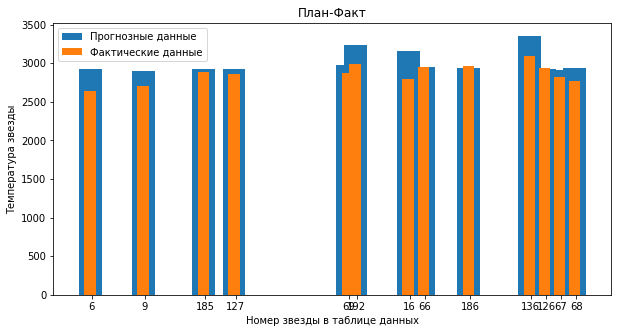

In [229]:
#построим график
X_axis = X_13['Unnamed: 0'].index
plt.figure(figsize=(10,5))
plt.bar(X_axis-0.2, X_13['test_preds'], 3, label = "Прогнозные данные")
plt.bar(X_axis-0.2, X_13['Temperature (K)'], 1.5, label = "Фактические данные")
plt.xticks(X_axis, X_13['Unnamed: 0'])
plt.xlabel("Номер звезды в таблице данных")
plt.ylabel("Температура звезды")
plt.legend(loc = 'upper left')
plt.title('План-Факт')
plt.show()

***Вывод:***  
Результат метрики RMSE модели 5 264.

## Улучшение нейронной сети

In [230]:
# определим параметры для подбора 
rs = np.random.RandomState(0)
grid = {
    "n_neurons_in":[features_count],
    'n_neurons_out':[1],
    'n_hidden_1':[150, 200, 300],
    'n_hidden_2':[15, 20, 30],
    'activation_1':[nn.ReLU(), nn.LeakyReLU()],
    'activation_2':[nn.ReLU(), nn.LeakyReLU()],
    'activation_out': [nn.ReLU(), nn.LeakyReLU()],
    'regularization':['batch_norm', 'dropout'],
    'batch_size':[150, 140, 135],
    'learning_rate':[0.0005, 0.007, 0.05, 0.0000007]
     
}

parameter_list = list(ParameterSampler(grid, n_iter=20, random_state=rs))



In [231]:
num_epochs = 1500
results = {}
best_score_overall = 1e+100000


In [232]:
#напишим метод, который будет инициализировать слой
def init_weights(layer):
    if type(layer) == nn.Linear:
        nn.init.normal_(layer.weight, mean=0, std=np.sqrt(2/layer.in_features))
        nn.init.normal_(layer.bias, mean=0, std=0)
        

Напишем цикл для подбора данных.

In [233]:
for i, param in enumerate(parameter_list):
    best_param = 1e+100000
    
    net_layers =[]
    net_layers.append(nn.Linear(param['n_neurons_in'], param['n_hidden_1']))
    if param['regularization'] =='dropout':
        net_layers.append(nn.Dropout(p=0.5))
    elif param['regularization'] =='batch_norm':
        net_layers.append(nn.BatchNorm1d(param['n_hidden_1']))
    if param['activation_1'] is not ReLU():
        net_layers.append(param['activation_1'])
    net_layers.append(nn.Linear(param['n_hidden_1'], param['n_hidden_2']))
        

    if param['regularization'] =='dropout':
        net_layers.append(nn.Dropout(p=0.5))
    elif param['regularization'] =='batch_norm':
        net_layers.append(nn.BatchNorm1d(param['n_hidden_2']))
    if param['activation_2'] is not ReLU():
        net_layers.append(param['activation_2'])
       
    net_layers.append(nn.Linear(param['n_hidden_2'], param['n_neurons_out']))
    if param['activation_out'] is not ReLU():
        net_layers.append(param['activation_out'])
        
    net = nn.Sequential(*net_layers) # такая запись позволяет передавать элементы списка как параметры для инициализации
    net.apply(init_weights) #применим метод ко всем слоям сети
    optimizer = torch.optim.Adam(net.parameters(),lr=0.2)
    loss = nn.MSELoss()
    train_data = TensorDataset(X_train, y_train)
    train_loader = DataLoader(dataset = train_data, batch_size=param['batch_size'], shuffle=True)
    for _ in range(num_epochs):
        for i_batch, batch in enumerate(train_loader):
            X_batch, y_batch = batch
            preds_batch = net.forward(X_batch)
            loss_value = loss(preds_batch.reshape(-1,), y_batch)
            optimizer.zero_grad() 
            loss_value.backward()            
            optimizer.step()
        
            if i_batch % 20 ==0 or i_batch ==i_batch-1:
                net.eval()
                test_preds = net.forward(X_test)
                
                rmse_test = round(np.sqrt(mean_squared_error(y_test, test_preds.detach().numpy())))
            

                is_best_overall = rmse_test < best_score_overall
                best_score_overall = min(rmse_test, best_score_overall)
                
                is_best_param = rmse_test < best_param
                best_param = min(rmse_test, best_param)
                
                if is_best_overall:
                    torch.save(net, 'best_model.pth')
                

                if is_best_param:
                    results[i] = (param, best_param)
                

In [234]:
len(test_preds)

72

In [235]:
round(np.sqrt(mean_squared_error(y_test, test_preds.detach().numpy())))

5582

In [236]:
#выведем результат
results_df = pd.DataFrame.from_dict(results, orient='index')
params = results_df[0].apply(pd.Series).drop(columns={'n_neurons_out', 'n_neurons_in'}, axis=1)
params['score'] = results_df[1]
results_df = params.sort_values(by='score')
results_df.head()

,regularization,n_hidden_2,n_hidden_1,learning_rate,batch_size,activation_out,activation_2,activation_1,score
10,batch_norm,15,200,0.0005,150,ReLU(),ReLU(),ReLU(),4749
1,batch_norm,30,300,0.0500,140,ReLU(),ReLU(),ReLU(),4781
17,batch_norm,30,150,0.0005,140,ReLU(),ReLU(),ReLU(),4815
0,batch_norm,30,150,0.0070,150,ReLU(),LeakyReLU(negative_slope=0.01),LeakyReLU(negative_slope=0.01),4863
15,dropout,15,200,0.0500,150,ReLU(),ReLU(),LeakyReLU(negative_slope=0.01),4868


In [237]:
X_best = pd.merge(X_test_mo, y_test_m, left_index=True, right_index = True)
X_best.head(5)

,Unnamed: 0,Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Temperature (K)
0,24,0.01300,0.014,11.89,2,bluewhite,16500
1,6,0.00073,0.127,17.22,0,red,2637
2,93,0.35700,1.130,4.78,3,yellowish,4980
3,109,352000.00000,67.000,-5.79,4,blue,33421
4,104,112000.00000,12.000,-5.91,4,blue,11096


In [238]:
model = torch.load('best_model.pth')
model.eval()
preds = model.forward(X_test)
preds= preds.detach().numpy()
preds = pd.DataFrame(data=preds, columns =['preds'])

X_best['preds'] = preds
X_best

,Unnamed: 0,Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Temperature (K),preds
0,24,0.01300,0.0140,11.89,2,bluewhite,16500,11722.487305
1,6,0.00073,0.1270,17.22,0,red,2637,3347.328613
2,93,0.35700,1.1300,4.78,3,yellowish,4980,3173.211426
3,109,352000.00000,67.0000,-5.79,4,blue,33421,20153.298828
4,104,112000.00000,12.0000,-5.91,4,blue,11096,18502.046875
...,...,...,...,...,...,...,...,...
67,84,0.00067,0.0089,12.17,2,bluewhite,14100,11641.268555
68,117,74000.00000,876.0000,-10.25,5,red,3625,2816.134766
69,194,0.00540,0.3190,12.43,1,red,3523,3026.399414
70,177,170000.00000,1779.0000,-9.90,5,bluewhite,11000,17344.003906


In [239]:
#определим 13 звезд с наибольшей температурой
X_best_sorted = X_best.sort_values(by = 'Temperature (K)')
X_best_13 = X_best_sorted.head(13)

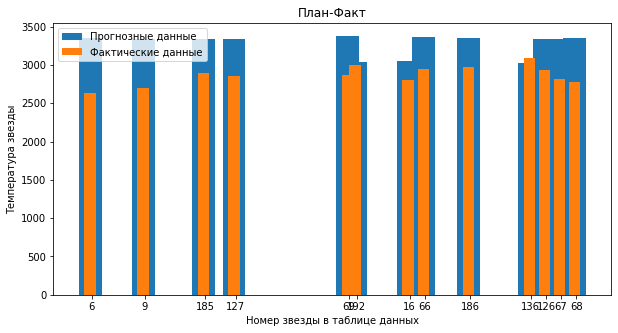

In [240]:
#построим график
X_axis_b = X_best_13['Unnamed: 0'].index
plt.figure(figsize=(10,5))
plt.bar(X_axis_b-0.2, X_best_13['preds'], 3, label = "Прогнозные данные")
plt.bar(X_axis_b-0.2, X_best_13['Temperature (K)'], 1.5, label = "Фактические данные")
plt.xticks(X_axis_b, X_best_13['Unnamed: 0'])
plt.xlabel("Номер звезды в таблице данных")
plt.ylabel("Температура звезды")
plt.legend(loc = 'upper left')
plt.title('План-Факт')
plt.show()

## Выводы  
Как видно из приведенных данных, базовая модель с использованием 7 скрытых слоев показала результат хуже, чем модель, использующая 2 слоя и batch_normalization. 